# Project 5 - Nicole Zeffer - nzeffer

In [2]:
# setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

# === Question 1 ===

### 1 - Import data

In [3]:
df = pd.read_csv('movies-2001-2010.csv')
rdate = pd.to_datetime(df['ReleaseDate'])
df['ReleaseDate'] = rdate
df["ProfitMargin"] = (df["Gross"] - df["Budget"]) / df["Gross"]
df.shape

(439, 14)

# === Question 2 ===

### 2ai - How many dramas (i.e., Genre=="Drama") are there in the database?

In [4]:
dfdrama = df[(df.Genre == "Drama")]
dfdrama.shape

# There are 101 dramas in the database

(101, 14)

### 2aii - Which drama has the highest budget?

In [5]:
dfbud = dfdrama[["Title", "Budget"]]
dfbudsort = dfbud.sort(columns='Budget', ascending = False)

dfbudsort.head(1)

# The Curious Case of Benjamin Button with a budget of $160,000,000

,Title,Budget
45,The Curious Case of Benjamin Button,160000000


### 2aiii - Which drama has the highest gross?

In [6]:
dfgross = dfdrama[["Title", "Gross"]]
dfgrosssort = dfgross.sort(columns='Gross', ascending = False)

dfgrosssort.head(1)

# The Passion of the Christ with a gross of $370,782,930

,Title,Gross
296,The Passion of the Christ,370782930


In [7]:
dfdrama

,Title,Gross,Budget,ReleaseDate,MPAARating,RunningTime,Distributor,Source,Genre,CreativeType,Director,RottenTomatoesRating,IMDBRating,ProfitMargin
6,Four Brothers,74494381,30000000,2005-08-12,R,109,Paramount Pictures,Original Screenplay,Drama,Contemporary Fiction,John Singleton,52,6.8,0.597285
9,8 Mile,116724075,41000000,2002-11-08,R,110,Universal,Original Screenplay,Drama,Contemporary Fiction,Curtis Hanson,74,6.7,0.648744
12,A Good Year,7459300,35000000,2006-11-10,PG-13,118,20th Century Fox,Based on Book/Short Story,Drama,Contemporary Fiction,Ridley Scott,24,6.8,-3.692129
13,All the King's Men,7221458,55000000,2006-09-22,PG-13,128,Sony Pictures,Based on Book/Short Story,Drama,Historical Fiction,Steven Zaillian,11,6.0,-6.616191
17,Ali,58183966,109000000,2001-12-25,R,159,Sony Pictures,Based on Real Life Events,Drama,Dramatization,Michael Mann,67,6.6,-0.873368
25,American Gangster,130164645,100000000,2007-11-02,R,157,Universal,Based on Real Life Events,Drama,Dramatization,Ridley Scott,79,7.9,0.231742
32,Atonement,50980159,30000000,2007-12-07,R,130,Focus Features,Based on Book/Short Story,Drama,Contemporary Fiction,Joe Wright,83,7.9,0.411536
34,The Aviator,102608827,110000000,2004-12-17,PG-13,170,Miramax,Based on Real Life Events,Drama,Dramatization,Martin Scorsese,88,7.6,-0.072033
44,Baby Boy,28734552,16000000,2001-06-27,R,130,Sony Pictures,Original Screenplay,Drama,Contemporary Fiction,John Singleton,69,6.1,0.443179
45,The Curious Case of Benjamin Button,127509326,160000000,2008-12-25,PG-13,167,Paramount Pictures,Based on Book/Short Story,Drama,Fantasy,David Fincher,72,8.0,-0.254810


### 2b - Create a boxplot showing the distribution of budget among dramas. Explain what information can be obtained by reading this plot.

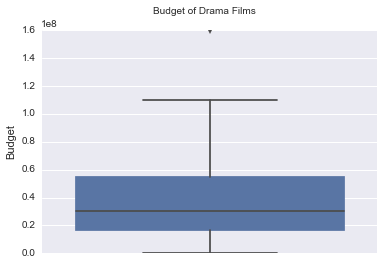

In [8]:
sns.boxplot(y = 'Budget', data = dfdrama);
plt.suptitle("Budget of Drama Films")

# You can determine that the median Budget for drama films is around 0.32 or 0.33 (in the unit of hundreds of millions). You can
# also determine the maximum and minimum Budgets (without outliers), as well as the 1st and 3rd quartiles.

### 2c - Create a boxplot to compare the budget distributions within the different creative types within the genre "Dramas".

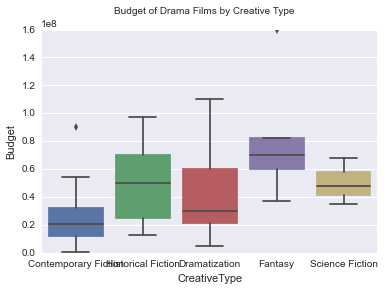

In [9]:
sns.boxplot(x = 'CreativeType', y = 'Budget', data = dfdrama);
plt.suptitle("Budget of Drama Films by Creative Type")

# Finding #1 - The Contemporary creative type has the lowest median budget of all the creative types
# Finding #2 - The Contemporary creative type also has the lowest minimum budget of all the creative types
# Finding #3 - The Contemporary creative type also has the lowest maximum budget of all the creative types

### 2d - Create a pie chart to show the distribution of the number of movies for each creative type among drama films, and explain what information can be gathered from reading this plot

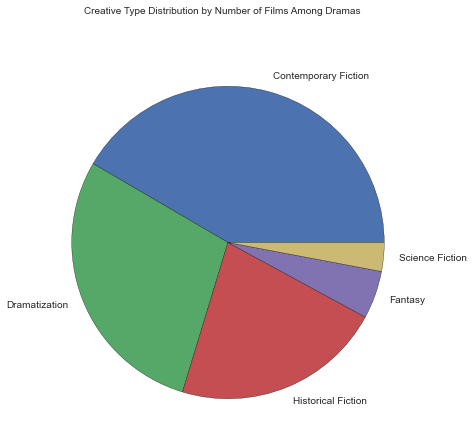

In [10]:
dfdrama.CreativeType.value_counts().plot(kind="pie", figsize=(7, 7))
plt.suptitle("Creative Type Distribution by Number of Films Among Dramas")
plt.ylabel('')

# You can determine that Contemporary Fiction has the largest number of movies per each creative type in the Drama genre,
# and that Science Fiction has the very least. Science Fiction and Fantasy, even with their numbers combined, are still
# less than half of the next largest creative type (Historical Fiction).

### 2e - Create a boxplot comparing Profit Margin distributions of different Creative Types among Dramas

(-5, 1)

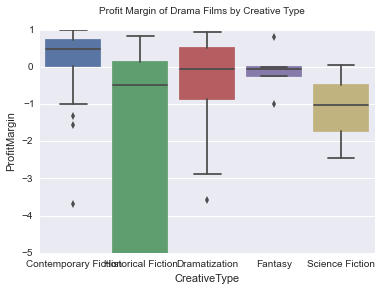

In [11]:
#df["ProfitMargin"] = (df["Gross"] - df["Budget"]) / df["Gross"]
axes = sns.boxplot(x = 'CreativeType', y = 'ProfitMargin', data = dfdrama);
plt.suptitle("Profit Margin of Drama Films by Creative Type")
axes.set_ylim([-5,1])

# The Profit Margin of Contemporary Fiction appears to be generally higher than the rest of the creative types (the mean
# Profit Margin of Contemporary Fiction is the highest, as well as the maximum).
# Additionally, the 1st and 3rd Profit Margin Contemporary Fiction quartiles are the highest among all the other creative types.

### 2f - Create a scatterplot matrix with Budget, Gross, ProfitMargin, RunningTime, and RottenTomatoesRating (excluding films whose ProfitMargin is less than -1)

C:\Users\Nicole\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


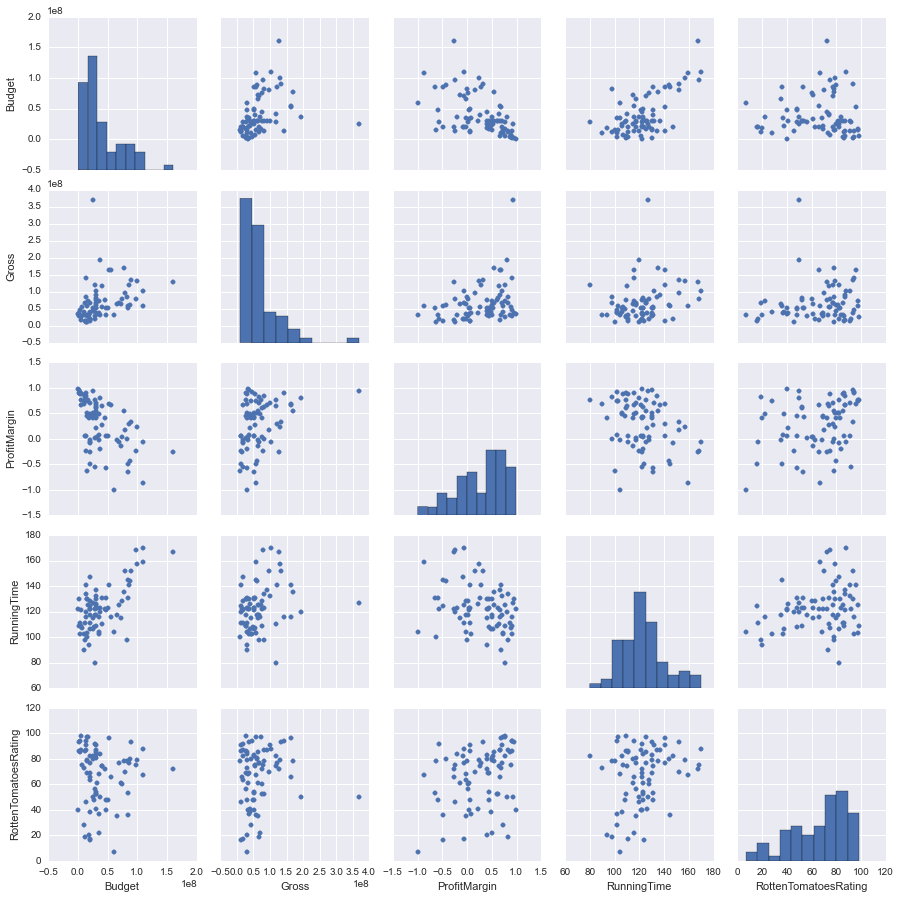

In [12]:
df2f = dfdrama[(dfdrama.ProfitMargin >= -1)]

sns.pairplot(df2f, vars=['Budget', 'Gross', 'ProfitMargin', 'RunningTime', 'RottenTomatoesRating']);

# The variable that most clearly exhibits a positive correlation with RunningTime is Budget, however it could be argued that
# Gross also has a positive correlation with RunningTime (although it is not as clear as Budget).

### 2g - Calculate the correlation using a barchart (pearson, spearman, and kendall) between RunningTime and Budget, Gross, and ProfitMargin.

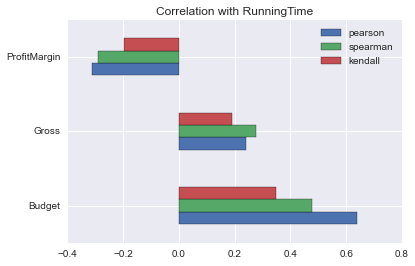

In [13]:
corr_metrics = ['pearson', 'spearman', 'kendall']
other_measurements = ['Budget', 'Gross', 'ProfitMargin']
cols = {m: [df2f['RunningTime'].corr(df2f[x], method=m) for x in other_measurements] for m in corr_metrics}
df_corr = pd.DataFrame(cols, index=other_measurements, columns=corr_metrics)
df_corr.plot(kind='barh', title='Correlation with RunningTime');
sns.set_style('darkgrid')

# Budget has a strong positive correlation with RunningTime, meaning the larger the budget, the longer the movie.
# Also, ProfitMargin has a negative correlation with RunningTime, meaning the longer the movie, the less the profit margin.

### 2h - Create a scatterplot with a linear fit for Budget vs RunningTime

C:\Users\Nicole\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


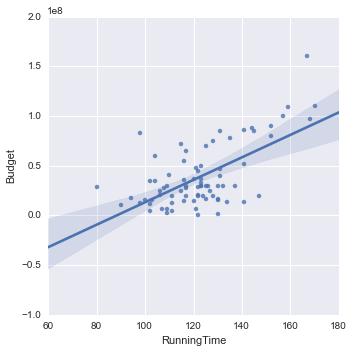

In [14]:
# Budget is Y, RunningTime is X
model2h = smf.ols('Budget ~ RunningTime', data=df2f).fit()

# Plot the regression line together with the data
xs = np.linspace(3, 15, 2)
ys_predicted = model2h.predict({'RunningTime': xs})
sns.lmplot(x='RunningTime', y='Budget', data=df2f);
sns.set_style('darkgrid')

### 2i - Display the summary of a linear regression model of Budget from RunningTime

In [15]:
model2h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Budget   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     52.28
Date:                Thu, 19 Nov 2015   Prob (F-statistic):           3.23e-10
Time:                        21:34:06   Log-Likelihood:                -1436.7
No. Observations:                  78   AIC:                             2877.
Df Residuals:                      76   BIC:                             2882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -9.983e+07   1.94e+07     -5.151      0.000     -1.38e+08 -6.12e+07
RunningTime   1.13e+06   1.56e+05      7.230      0.000      8.19e+05  1.44e+06
==============================================================================
Omnibus:                        4.981   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.184
Skew:                           0.523   Prob(JB):                        0.123
Kurtosis:                       3.441   Cond. No.                         867.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2j - Below is Trend Lines Model description generated using Tableau with the same data. Explain what each of the following fields means and how they are related to the interpreting the result of the regression.

#### Worked w/ Phill for this one
#### (j-1): residual degrees of freedom (DF) - Degrees of freedom refer to the amount of points that are allowed to vary from the regression line--in our model, 2 points are not allowed to vary from the regression line.
#### (j-2): SSE (sum squared error) - SSE is the difference between your estimation and actual data (estimated - actual). It tells you how far off you were with your estimation of the data.
#### (j-3): MSE (mean squared error) - MSE is very much like SSE, but instead it tells us how far the points are away from the actual data ON AVERAGE.
#### (j-4): R-Sqaured - R-squared indicates the data's correlation with the regression line (0-1).
#### (j-5): p-value (significance) - p-val is the chance of our assumption being incorrect. Ideally, you want a very small p-value for the lowest error margin.

### 2k -  Use a diagnostic statistic of your choice (e.g., Cook's distance) to identify outliers in the regression model. Filter the outliers, and build a new regression model. Compare the R-squared values, and create a scatterplot with the regression lines of both the old and the new models.

In [16]:
# Cook's Distance
influence = model2h.get_influence()
cooks_distance = influence.cooks_distance[0]
no_of_observations = len(df2f)

# Use an empirical threshold value
cooks_threshold = 4 / no_of_observations

# Show outliers
df2f[['Budget', 'RunningTime']][cooks_distance > cooks_threshold]

# Remove outliers using Cook's Distance
outlier_criterion = (cooks_distance > cooks_threshold)
outlier_indexes = np.nonzero(outlier_criterion)[0]
df2f_no_outliers = df2f[~outlier_criterion]

# New model without outliers
model2k = smf.ols('Budget ~ RunningTime', data = df2f_no_outliers).fit()

# Summarize new model
model2k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Budget   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     55.35
Date:                Thu, 19 Nov 2015   Prob (F-statistic):           1.82e-10
Time:                        21:34:06   Log-Likelihood:                -1332.4
No. Observations:                  73   AIC:                             2669.
Df Residuals:                      71   BIC:                             2673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -1.037e+08   1.89e+07     -5.476      0.000     -1.41e+08 -6.59e+07
RunningTime  1.144e+06   1.54e+05      7.440      0.000      8.37e+05  1.45e+06
==============================================================================
Omnibus:                        0.830   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.874
Skew:                           0.110   Prob(JB):                        0.646
Kurtosis:                       2.512   Cond. No.                         962.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Compare the R-squared values

# The R-squared of the new model is 0.438, whereas the R-squared of the old model is 0.408. It may not seem like much,
# but 0.030 is a fairly substantial difference in stats.

C:\Users\Nicole\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


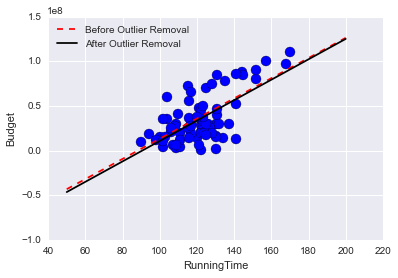

In [18]:
# Plot a new scatterplot showing both old + new regression line

newscatter = np.linspace(50, 200, 2)

predicted1 = model2h.predict({'RunningTime': newscatter})
predicted2 = model2k.predict({'RunningTime': newscatter})

plt.scatter(df2f_no_outliers.RunningTime, df2f_no_outliers.Budget, s = 100, marker = 'o');
plt.scatter(df2f.ix[outlier_indexes, 'RunningTime'], df2f.ix[outlier_indexes, 'Budget'], s = 100, color = 'r', marker = 'o');

plt.plot(newscatter, predicted1, 'r--', label = 'Before Outlier Removal');
plt.plot(newscatter, predicted2, 'k', label = 'After Outlier Removal');
plt.legend(loc = 'upper left');
plt.xlabel('RunningTime');
plt.ylabel('Budget');

### 2l - Summarize the above analysis, and make recommendations to George regarding the following aspects of the new movie: recommend a creative type, recommend a range of running time, and recommend a range of production budget

## [[Creative Type]] - Looking at possibilities for Creative Type for George...
##### 2c summarizes that Contemporary Fiction Drama films have the all-around lowest Budget of all the Creative Types
##### 2d summarizes that Contemporary Fiction Drama films have the largest amount of films of all the Creative Types
##### 2e summarizes that Contemporary Fiction Drama films have the all-around largest Profit Margin of all the Creative Types
### Therefore, George should go with Contemporary Fiction as a Creative Type.
## [[Running Time]] - Looking at possibilities for Running Time for George...
##### 2f (RunningTime vs Budget) summarizes that as Running Time of Drama films increases, so does Budget
##### 2g summarizes that as Running Time of Drama films increases, Profit Margin decreases
##### 2k summarizes that as Running Time of Drama films increases, Budget also increases
### Therefore, George should go with a very short Running Time (likely between 90 and 120/130 minutes, looking at the 2f RunningTime vs ProfitMargin plot).
## [[Production Budget]] - Looking at possibilities for Production Budget for George...
##### 2f (Budget vs ProfitMargin) summarizes that as Budget for Drama films increases, Profit Margin generally decreases
### Therefore, George should go with a very low Budget (likely between 0 and 50 million, looking at the 2f Budget vs ProfitMargin plot).

# === Question 3 ===

### 3a - Based on your recommended creative type and production budget in Problem 2, perform additional analysis and recommend the following to George regarding the new movie: recommend a director, and recommend a distributor

In [19]:
# df narrowing
df3 = dfdrama[(dfdrama.ProfitMargin >= -1)]
df3 = df3[(df3.CreativeType == "Contemporary Fiction")]
df3 = df3[["Title", "Budget", "RunningTime", "CreativeType", "Distributor", "Director", "ProfitMargin"]]
df3 = df3[(df3.Budget >= 0) & (df3.Budget <= 50000000)]
df3 = df3[(df3.RunningTime >= 90) & (df3.RunningTime <= 130)]

# Group by Distributor and sort by mean profit margin + display the top 10 Distributors with highest profit margin
dfdistrib = df3.groupby("Distributor")
dfdistrib.mean().sort(columns='ProfitMargin', ascending=False).head(10)

,Budget,RunningTime,ProfitMargin
Distributor,,,
Samuel Goldwyn Films,500000,122.000000,0.985053
Miramax,1700000,130.000000,0.952687
Lionsgate,5250000,109.000000,0.876479
Fox Searchlight,9875000,114.750000,0.835287
Walt Disney Pictures,16000000,107.500000,0.759753
Focus Features,17000000,116.000000,0.660910
New Line,32000000,121.333333,0.553761
Paramount Pictures,25500000,107.500000,0.537596
Universal,27250000,108.000000,0.376308


In [20]:
# Group by Director and sort by mean profit margin + display the top 10 Directors with highest profit margin
dfdirect = df3.groupby("Director")
dfdirect.mean().sort(columns='ProfitMargin', ascending=False).head(10)

,Budget,RunningTime,ProfitMargin
Director,,,
Alex Kendrick,500000,122,0.985053
Todd Field,1700000,130,0.952687
Sofia Coppola,4000000,102,0.910285
Zach Braff,2500000,109,0.906655
Danny Boyle,14000000,116,0.900934
Paul Haggis,6500000,107,0.880859
Anne Fletcher,12000000,98,0.816312
Darren Aronofsky,6000000,109,0.771312
Adam Shankman,11000000,102,0.733185


#### According to my analysis, it would appear that the Director Alex Kendrick would be the best Director pick for George, and the best Distributor choice would be Samuel Goldwyn Films.

### 3b - What are the limitations of the above analyses (including the analyses in Problem 2)? How can you potentially improve them?

#### We don't take into account potentially confounding variables such as changing times, for example--we are assuming that (hypothetically) just because Contemporary Fiction comes up as the most popular genre in our analysis overall, that it is still the most popular genre. It could be the case that Contemporary Fiction was wildly popular in every year except the most recent decade, where its popularity (or ProfitMargin, for the sake of the homework) decayed significantly, which would indicate that Contemporary Fiction is not the most popular or most well-liked genre as of recently.
#### In order to account for this, we might consider adding "hue='year'" to analyze how things have changed over time.

### 3c - Correlation, of course, does not mean causation.  What would you tell George about how to interpret your recommendations given this?

#### George, a valuable lesson to keep in mind is that correlation does not imply causation. So, take my suggestions with a grain of salt--they are not guarantees for a successfull movie. Just because Running Time is negatively correlated with Profit Margin (that is, as Running Time increases, Profit Time decreases), it does not guarantee that if you make a film with a short Running Time that your Profit Margin will be high.